## What is a start-up anyway?

In June 2025, Dr. Ilya Strebulaev, in partnership with Stanford Business School released the Unicorn report, a comprehensive data-driven study on the characteristics of the iconic Tech Unicorn startups that have captured our collective imagination since Mark Zuckerberg and a group of misfits released the social atomic bomb that was Facebook 20 years ago. 

The thing is, even as a former venture analyst who has worked in an actual startup accelerator, I tested myself by trying to explain what a startup is to my best friend, someone from an entirely different world (she is a high school teacher, you know, someone with an actual job).The basic definitions are there : new company, small team of nerds in white t-shirts and jeans in their parents' basements, disruptive innovation as central product or service. But beyond that?

Strebulaev's report proposes several features of the prototypical startup, which cover exit time, funding amounts, founder profiles and industry scope. 

With this academic project and the unidentified datatype provided in the assignment instructions, I will try to emulate his research (with a much less impressive coding foundation). The dataset provided also contains many companies that are not startups, but the overall theme will be the same. How long does it take usually for an investor to exit a venture? How much money does a new venture raise? Do you have to move to NorCal or London to found a successful company, or can you go somewhere where the weather doesn't make you wanna cry? 

link to Dr. Strebulaev's report : https://www.patreon.com/TheVentureMindset/shop/unicorn-report-466660?source=storefront

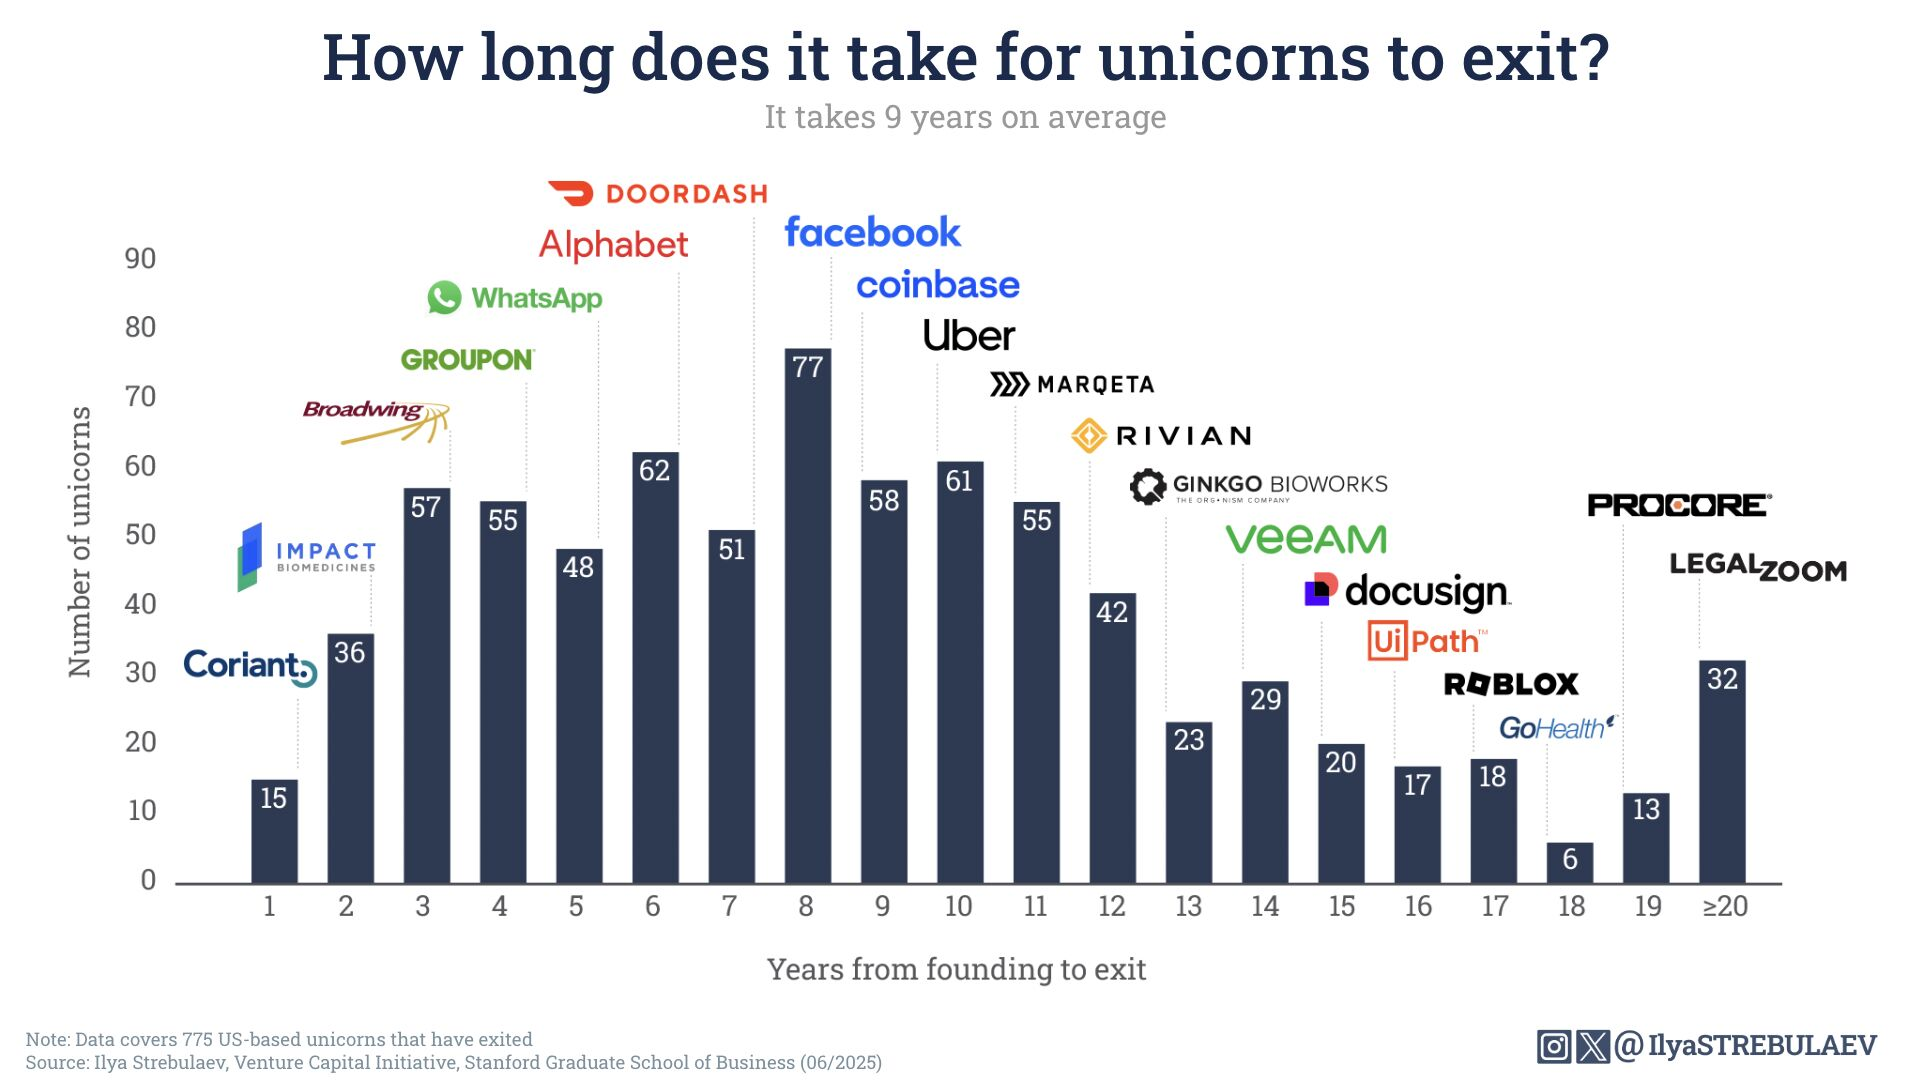

# Table of Contents
* [Chapter 1: Importing libraries, files and pre-treating the data](#chapter1)
    * [1.1. Importing Libraries and files](#section_1_1)
    * [1.2. Adding new columns for analysis and data cleaning](#section_1_2)
* [Chapter 2 : Geography of companies](#chapter2)
    * [2.1. Where are the companies in our list from?](#section_2_1)
    * [2.2. Where are the main categories of companies by continent?](#section_2_2)
    * [2.3. Time to exit by continent](#section_2_3)
* [Chapter 3 : Revenue vs. Headcount vs. Time to Exit](#chapter3)
    * [Section 3.1 : Time to Exit and Exit Status by revenue profile](#section_3_1)
    * [Section 3.2 : Time to Exit and Exit Status by headcount](#section_3_2)

* [Chapter 4 : How long does it take to exit?](#chapter4)
    * [Section 4.1 : Are we there yet? Time since foundation for exited vs. non-exited companies](#section_4_1)

* [Chapter 5 : Investments](#chapter5)
    * [Section 5.1 : Further data cleaning for investment data](#section_5_1)
    * [Section 5.2 : Breakdown of investments by round type](#section_5_2)
    * [Section 5.3 : Who asked for the most money?](#section_5_3)
    * [Section 5.4 : Investment trends over time](#section_5_4)
    * [Section 5.5 : Investment by categories over time](#section_5_5)
        
* [Chapter 6 : Who's buying?](#chapter6)
    * [Section 6.1 : Data cleaning for acquisition data](#section_6_1)       
    * [Section 6.2 : General acquirer profiles](#section_6_2)       
    * [Section 6.3 : Leading buyers over time](#section_6_3)       

* [Chapter 7 : People First](#chapter7)
    * [Section 7.1 : A project manager by any other name](#section_7_1)       
    * [Section 7.2 : What school did you go to?](#section_7_2)       
    * [Section 7.3 : Top Schools = Better exit odds?](#section_7_3) 
    * [EXTRA : ESCP Watch](#section_7_4) 
    
* [Annex : Other interesting questions you may try to answer are](#chapter8)

## Chapter 1: Importing libraries, files and pre-treating the data <a class="anchor" id="chapter1"></a>


### 1.1 <a id="section_1_1"></a> Importing libraries and data treatment

In [167]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
pd.set_option('display.max_columns', None)

##Let's avoid scientific notation for this project because it's annoying and irrelevant to money amounts
pd.set_option('display.float_format', '{:,.2f}'.format)

Import the 4 tabs

In [168]:
C_df = pd.read_excel(r'C:\Users\user\OneDrive\Documents\ESCP\Term 2\Introduction to Python\Final Assignment\Project Dataset.xlsx', sheet_name = 'COMPANY' 
                  )
I_df = pd.read_excel(r'C:\Users\user\OneDrive\Documents\ESCP\Term 2\Introduction to Python\Final Assignment\Project Dataset.xlsx', sheet_name = 'INVESTMENT' 
                  )
E_df = pd.read_excel(r'C:\Users\user\OneDrive\Documents\ESCP\Term 2\Introduction to Python\Final Assignment\Project Dataset.xlsx', sheet_name = 'EMPLOYEE' 
                  )
A_df = pd.read_excel(r'C:\Users\user\OneDrive\Documents\ESCP\Term 2\Introduction to Python\Final Assignment\Project Dataset.xlsx', sheet_name = 'ACQUISITION' 
                  )

I imported a list of countries and continents from https://worldpopulationreview.com/country-rankings/list-of-countries-by-continent

In [169]:
Continents = pd.read_excel(r'C:\Users\user\OneDrive\Documents\ESCP\Term 2\Introduction to Python\Final Assignment\Project Dataset.xlsx', sheet_name = 'Continents' 
                  )

In [170]:
Continents.head()

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Andorra,Europe


### 1.2 <a id="section_1_2"></a> Adding new columns for analysis and data cleaning

In [171]:
# Let's drop our duplicates
A_df = A_df.drop_duplicates()
C_df = C_df.drop_duplicates()
E_df = E_df.drop_duplicates()
I_df = I_df.drop_duplicates()


In [172]:
C_df.head(1)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,TangoMe,"Android, Apps, iOS, Messaging, Mobile","Mountain View, California, United States","Sep 9, 2009",—,—,$10M to $50M,101-250


Create new columns that split the Location column into city and country

In [173]:
## The following cell was generated using generative AI, by using the following prompt 
## "Apply a python function to a column in Pandas python in order to get 
#the last string in a column that has values after a  comma, like : 
# ABC, DEF. Here I would want to keep DEF"

C_df['Country'] = C_df['LOCATION'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else None)

## same thing but get index 0 instead of -1 to extract city, which is before the comma
C_df['City'] = C_df['LOCATION'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else None)

In [174]:
C_df = pd.merge(C_df, Continents, on = "Country", how = "left")

In [175]:
C_df.head(2)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent
0,TangoMe,"Android, Apps, iOS, Messaging, Mobile","Mountain View, California, United States","Sep 9, 2009",—,—,$10M to $50M,101-250,United States,Mountain View,North America
1,Zume Pizza,"Consumer, Food and Beverage, Food Delivery","Mountain View, California, United States","Sep 8, 2015",—,Jan 2020,$50M to $100M,101-250,United States,Mountain View,North America


Convert the dates from their current format to something easier to analyze

In [176]:
##THE INITIAL SKELETON FOR THIS CELL WAS GENERATED USING GENAI
## The prompt was to ask ChatGPT to clean a column with the format "Sep 8, 2015" to get a clean date in the format yyyy-mm-dd

def parse_mixed_dates(x):
    x = str(x).strip()
    if x in ["", "—", "nan", "NaN"]:
        return pd.NaT
    # Try full date: "Aug 1, 2014"
    try:
        return pd.to_datetime(x, format="%b %d, %Y")
    except ValueError:
        # Try year only: "2013"
        try:
            return pd.to_datetime(x, format="%Y")
        except ValueError:
            # Try month and year only: "Dec 2013"
            try:
                return pd.to_datetime(x, format="%b %Y")
            except ValueError:
                return pd.NaT


In [177]:
C_df["FOUNDED_ON"] = C_df["FOUNDED_ON"].apply(parse_mixed_dates)
C_df["EXITED_ON"] = C_df["EXITED_ON"].apply(parse_mixed_dates)


In [178]:
C_df.head(1)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent
0,TangoMe,"Android, Apps, iOS, Messaging, Mobile","Mountain View, California, United States",2009-09-09,NaT,—,$10M to $50M,101-250,United States,Mountain View,North America


Create a column for time to exit, which is the date of exit minus the founding date
 
 
In case Exited_on or Founded_On is null, switch to NaT

In [179]:
def time_to_exit(df):
    x,y = df['FOUNDED_ON'], df['EXITED_ON']
    if pd.isna(x) or pd.isna(y):
        return pd.NaT
    return round((y - x).days / 365.25,1)

In [180]:
C_df["Time to Exit"] = C_df.apply(time_to_exit, axis=1)


In [181]:
C_df.head(2)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit
0,TangoMe,"Android, Apps, iOS, Messaging, Mobile","Mountain View, California, United States",2009-09-09,NaT,—,$10M to $50M,101-250,United States,Mountain View,North America,NaT
1,Zume Pizza,"Consumer, Food and Beverage, Food Delivery","Mountain View, California, United States",2015-09-08,NaT,Jan 2020,$50M to $100M,101-250,United States,Mountain View,North America,NaT


Revenue Range is a particularly annoying column, since it does not give me the exact value and needs to be ordered

Here, I define the logical order for the Revenue Brackets

In [182]:
C_df['REVENU_RANGE'].unique()

array(['$10M to $50M', '$50M to $100M', '$1B to $10B', '$10B+',
       '$100M to $500M', '$500M to $1B', 'Less than $1M', '$1M to $10M',
       '—'], dtype=object)

In [183]:
C_df['REVENU_RANGE'].value_counts()

$1M to $10M       230
$10M to $50M      216
$100M to $500M    166
$50M to $100M     103
$1B to $10B        77
Less than $1M      73
$500M to $1B       47
—                  46
$10B+              42
Name: REVENU_RANGE, dtype: int64

In [184]:
revenue_order = [
    'Less than $1M',
    '$1M to $10M',
    '$10M to $50M',
    '$50M to $100M',
    '$100M to $500M',
    '$500M to $1B',
    '$1B to $10B',
    '$10B+',
    '—'
]

C_df['REVENU_RANGE'] = pd.Categorical(
    C_df['REVENU_RANGE'],
    categories=revenue_order,
    ordered=True
)

In [185]:
ordered_intervals = ['1-10','11-50','51-100','101-250','251-500',
                     '501-1000','1001-5000','5001-10000','10001+','Unknown']

C_df['EMPLOYEE_NUMBER'] = pd.Categorical(
    C_df['EMPLOYEE_NUMBER'],
    categories=ordered_intervals,
    ordered=True
)

In [186]:
C_df['REVENU_RANGE'].value_counts()

$1M to $10M       230
$10M to $50M      216
$100M to $500M    166
$50M to $100M     103
$1B to $10B        77
Less than $1M      73
$500M to $1B       47
—                  46
$10B+              42
Name: REVENU_RANGE, dtype: int64

In [187]:
C_df.dtypes

COMPANY_NAME               object
CATEGORY                   object
LOCATION                   object
FOUNDED_ON         datetime64[ns]
EXITED_ON          datetime64[ns]
CLOSED_ON                  object
REVENU_RANGE             category
EMPLOYEE_NUMBER          category
Country                    object
City                       object
Continent                  object
Time to Exit               object
dtype: object

Drop the CLOSED_ON column because there is an extremely low number of rows where this column is filled in 

In [188]:
C_df = C_df.drop(columns=['CLOSED_ON'])

Clean the number of employees so that they become a hierarchy

In [189]:
C_df.head(3)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit
0,TangoMe,"Android, Apps, iOS, Messaging, Mobile","Mountain View, California, United States",2009-09-09,NaT,$10M to $50M,101-250,United States,Mountain View,North America,NaT
1,Zume Pizza,"Consumer, Food and Beverage, Food Delivery","Mountain View, California, United States",2015-09-08,NaT,$50M to $100M,101-250,United States,Mountain View,North America,NaT
2,LabCorp,"Biotechnology, Health Care, Hospital, Life Sci...","Burlington, North Carolina, United States",1978-09-05,1988-07-15,$1B to $10B,10001+,United States,Burlington,North America,9.90


## Chapter 2: Geography of companies <a class="anchor" id="chapter2"></a>


### 2.1 <a id="section_2_1"></a> Where are the companies in our list from?

In [190]:
## I perform a simple groupby on city and add the percentage 
## representation for each city in our dataset. 
City_Count = (
    C_df
    .groupby(["City", "Continent"], as_index=False)
    .agg({"COMPANY_NAME": "nunique"})
    .rename(columns={"COMPANY_NAME": "# of companies on the list"})
    .assign(
        **{
            "% of total": lambda x: (
                (x["# of companies on the list"] / len(C_df)) * 100
            ).round(2)
        }
    )
    .sort_values(by="# of companies on the list", ascending=False)
)
City_Count.head(10)

,City,Continent,# of companies on the list,% of total
203,San Francisco,North America,173,17.30
164,New York,North America,111,11.10
123,London,Europe,58,5.80
25,Boston,North America,25,2.50
154,Mountain View,North America,22,2.20
174,Palo Alto,North America,19,1.90
10,Bangalore,Asia,19,1.90
21,Berlin,Europe,17,1.70
205,San Mateo,North America,16,1.60
15,Beijing,Asia,15,1.50


### As expected, this tech and finance-heavy dataset has 4 Bay Area cities, NYC, London, Boston and Berlin in the top 10 cities represented. Bangalore and Beijing are the top Asian countries on the list 

### However, NorCal, NYC and London only represent 41% of the dataset, which means that there is hope for cofounders who want to ditch the fog and rain


In [191]:
City_Count.loc[City_Count['# of companies on the list']<3].head(50)

,City,Continent,# of companies on the list,% of total
200,Salt Lake City,North America,2,0.20
90,Hawthorne,North America,2,0.20
27,Bristol,Europe,2,0.20
129,Los Gatos,North America,2,0.20
133,Madison,North America,2,0.20
43,Charlotte,North America,2,0.20
94,Holmdel,North America,2,0.20
196,Rockville,North America,2,0.20
96,Houston,North America,2,0.20
230,Tempe,North America,2,0.20


The good news is that you can found a company somewhere niche! This list of companies with only 1 or 2 companies on the list includes some emerging tech hubs (Calgary, Shenzhen, Charlotte, Mexico City) as well as some destinations with nice weather (Miami, Singapore, Cape Town)

### 2.2 <a id="section_2_2"></a>
Where are the main categories of companies by continent?

In [192]:
## I think the best visualization to show this is a treemap, for which I 
## need to initially create a grouping dataset
C_df_for_category_grouping = C_df

C_df_for_category_grouping['CATEGORY'] = C_df_for_category_grouping['CATEGORY'].str.split(',\s*')
C_df_for_category_grouping = C_df_for_category_grouping.explode("CATEGORY").reset_index(drop=True)

In [193]:
C_df_for_category_grouping.head(1)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit
0,TangoMe,Android,"Mountain View, California, United States",2009-09-09,NaT,$10M to $50M,101-250,United States,Mountain View,North America,NaT


In [194]:
## The following was generated using code that was sourced and adjusted from https://plotly.com/python/treemaps/
## There are so many categories, that I decide to include only categories with more than 2% representation in each continent subset
C_df_for_category_grouping_for_graph = (
    C_df_for_category_grouping
    .groupby(['Continent', 'CATEGORY'])
    .size()
    .reset_index(name='Count')
)

C_df_for_category_grouping_for_graph['Percent_in_Continent'] = (
    C_df_for_category_grouping_for_graph.groupby('Continent')['Count']
    .transform(lambda x: 100 * x / x.sum())
)

df_filtered = C_df_for_category_grouping_for_graph[C_df_for_category_grouping_for_graph['Percent_in_Continent'] >= 2]

fig = px.treemap(
    df_filtered,
    path=['Continent', 'CATEGORY'],
    values='Count',
    color='Continent',
    title='Main Startup Categories by Continent (≥2% of Continent)',
    width=800,
    height=800

)

fig.update_traces(
    textinfo='label+value+percent parent',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>% of continent: %{percentParent:.2%}<extra></extra>'
)

fig.update_layout(
    legend_title_text='Continent'
)

fig.show()


In [195]:
## Here I asked Gen AI to separate this graph into 2, one for North America, one for other continents, for better visibility 

In [196]:
df_NA = df_filtered[df_filtered['Continent'] == 'North America']

fig_NA = px.treemap(
    df_NA,
    path=['Continent', 'CATEGORY'],
    values='Count',
    color='Continent',
    title='Startup Categories - North America (≥2% of Continent)',
    width=800,
    height=800
)

fig_NA.update_traces(
    textinfo='label+value+percent parent',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>% of continent: %{percentParent:.2%}<extra></extra>'
)

fig_NA.update_layout(
    legend_title_text='Continent'
)

fig_NA.show()


# Filter for all other continents
df_other = df_filtered[df_filtered['Continent'] != 'North America']

fig_other = px.treemap(
    df_other,
    path=['Continent', 'CATEGORY'],
    values='Count',
    color='Continent',
    title='Startup Categories - Other Continents (≥2% of Continent)',
    width=800,
    height=800
)

fig_other.update_traces(
    textinfo='label+value+percent parent',
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>% of continent: %{percentParent:.2%}<extra></extra>'
)

fig_other.update_layout(
    legend_title_text='Continent'
)

fig_other.show()

 We can see with the above graph that the North American portfolio in the dataset specializes in Software, IT, SaaS and Entreprise Software, all Information Technology domains, at 64% of all companies. Finance (fintech, finserv), also holds a hefty 19%

 As for other markets, Europe mainly operates in Finance (45%), with IT taking a backseat at 42% (internet + software + IT+SaaS). In Asia and South America, two emerging markets, the leading company profile is E-Commerce

### 2.3 <a id="section_2_3"></a>
Time to exit by continent

There is a preconceived notion that companies in North America and Asia move faster than the rest of the world. 
Thus, for investors, they can expect a lower time to exit. Is this true?


What was the average exit time by country?

In [197]:
## Here I temporarily drop the rows that have no value for Time To Exit, to avoid any errors

C_df_for_country_analysis = C_df.dropna(subset=['Time to Exit'])


In [198]:
len(C_df_for_country_analysis)

322

In [199]:
Country_Exit_Time = (
    C_df_for_country_analysis
    .groupby("Country", as_index=False)
    .agg(
        Average_Time_Exit=("Time to Exit", "mean"),
        Count=("Time to Exit", "size")
    )
    .sort_values(by="Average_Time_Exit", ascending=False)
)

In [200]:
Country_Exit_Time

,Country,Average_Time_Exit,Count
6,Finland,74.70,2
12,Japan,58.75,2
5,Denmark,58.30,1
15,Russian Federation,55.35,4
8,Germany,45.39,11
19,Switzerland,39.68,4
17,Spain,39.25,2
18,Sweden,26.24,7
11,Ireland,18.75,2
21,United Kingdom,15.82,13


The overwhelming majority of rows are in the States, let's group by continent to balance things out

In [201]:
Continent_Exit_Time = (
    C_df_for_country_analysis
    .groupby("Continent", as_index=False)
    .agg(
        Average_Time_Exit=("Time to Exit", "mean"),
        Count=("Time to Exit", "size")
    )
    .sort_values(by="Average_Time_Exit", ascending=False)
)

In [202]:
Continent_Exit_Time

,Continent,Average_Time_Exit,Count
2,AsiaEurope,55.35,4
3,Europe,30.01,48
4,North America,14.83,233
1,Asia,13.32,31
6,South America,6.30,2
5,Oceania,5.87,3
0,Africa,4.80,1


Some of these companies, notably many in Europe, are exceptionally old. They come from a different era in terms of Finance and Venture Capital
Let's filter to keep companies that were founded after 2000 to remove those outliers that may skew our exit time metrics

In [203]:
cutoff_date = pd.to_datetime("31-12-1999", format="%d-%m-%Y")
C_df_for_country_analysis_filtered = C_df_for_country_analysis[C_df_for_country_analysis["FOUNDED_ON"] > cutoff_date]

In [204]:
Continent_Exit_Time_post_2000 = (
    C_df_for_country_analysis_filtered
    .groupby("Continent", as_index=False)
    .agg(
        Average_Time_Exit=("Time to Exit", "mean"),
        Count=("Time to Exit", "size"),
        std=("Time to Exit", 'std')
    )
    .sort_values(by="Average_Time_Exit", ascending=False)
)

In [205]:
Continent_Exit_Time_post_2000

,Continent,Average_Time_Exit,Count,std
2,North America,8.88,171,3.83
1,Europe,8.72,25,4.06
0,Asia,6.53,20,3.24
3,Oceania,5.87,3,7.01
4,South America,4.60,1,NaN


Surprisingly, North America and Europe, two mature markets, observe longer exit times on average (8.9 and 8.7 years) in the dataset than the emerging market of Asia (6.5 years). 

Other continents have too small of a sample size to state trends

In [206]:
Country_Exit_Time_post_2000 = (
    C_df_for_country_analysis_filtered
    .groupby("Country", as_index=False)
    .agg(
        Average_Time_Exit=("Time to Exit", "mean"),
        Count=("Time to Exit", "size"),
        Standard_Error=("Time to Exit", 'std'),
        Median=('Time to Exit', 'median')
    )
    .sort_values(by="Average_Time_Exit", ascending=False)
)

In [207]:
Country_Exit_Time_post_2000

,Country,Average_Time_Exit,Count,Standard_Error,Median
12,The Netherlands,12.40,1,NaN,12.40
4,Finland,10.00,1,NaN,10.00
10,Singapore,9.80,1,NaN,9.80
11,Sweden,9.67,4,2.01,9.60
13,United Kingdom,8.93,11,2.74,9.50
14,United States,8.91,159,3.59,8.50
6,Germany,8.82,6,5.86,6.75
1,Canada,8.52,12,6.36,9.40
0,Australia,8.30,2,7.92,8.30
3,China,7.14,13,2.43,7.20


For this small sample size, China and India demonstrate faster velocity than the mature states of UK, Sweden and USA. Other countries have too few datapoints

## Chapter 3: Revenue vs. Headcount vs. Time to Exit <a class="anchor" id="chapter3"></a>


### 3.1 <a id="section_3_1"></a>
Time to Exit and Exit Status by revenue profile

Are there a significant number of companies with high revenue and quick exit time? Or do you always need more time to reach a higher revenue bracket

In [208]:
C_df_for_revenue = C_df.dropna(subset=['Time to Exit'])


In [209]:
Exit_by_Revenue_Range = (
    C_df_for_revenue
    .groupby("REVENU_RANGE", as_index=False)
    .agg(
        Average_Time_Exit=("Time to Exit", "mean"),
        Count=("Time to Exit", "size"),
        std=("Time to Exit", 'std')
    )
    .sort_values(by="Average_Time_Exit", ascending=False)
)

In [210]:
Exit_by_Revenue_Range['Average_Time_Exit'] = round(Exit_by_Revenue_Range['Average_Time_Exit'],1)
Exit_by_Revenue_Range['std'] = round(Exit_by_Revenue_Range['std'],1)

In [211]:
## The following was generated with the help of code sourced from https://plotly.com/python/treemaps/

fig = px.bar(
    Exit_by_Revenue_Range,
    x="REVENU_RANGE",
    y="Average_Time_Exit",
    text="Average_Time_Exit",
    title="Average Startup Exit Time by Minimum Revenue Threshold",
    labels={'REVENU_RANGE': 'Revenue Threshold', 'Average_Time_Exit': 'Average Time to Exit (yrs)'},
    category_orders={"REVENU_RANGE": revenue_order}  # This line was fixed using Generative AI. I provided the initial plotly code and it helped fix the categorical order of the bars
)

fig.show()

In [212]:
Exit_by_Revenue_Range

,REVENU_RANGE,Average_Time_Exit,Count,std
7,$10B+,36.70,38,47.30
6,$1B to $10B,27.20,59,38.60
5,$500M to $1B,15.10,35,25.60
2,$10M to $50M,12.10,44,13.80
4,$100M to $500M,11.00,76,5.70
3,$50M to $100M,10.70,36,7.10
1,$1M to $10M,8.70,29,6.90
0,Less than $1M,6.90,4,4.60
8,—,2.60,1,NaN


It comes as no surprise that companies that wait longer before exiting often reach higher revenue points, with companies reaching a 10B in revenue taking more than twice the time to exit (36.7 years) than companies that reached 500M to 1B (15.1 years)

The trend is almost in prefect order, with the exception of companies making 10M to 50M taking slightly longer (12.1 years) than companies at 100M - 500M (11 years) and 50M-100M companies (10.7 years)

But do higher revenue thresholds lead to more exits?

In [213]:
# I create a column to differentiate exited vs non-exited companies
C_df['Company_exited?'] = np.where(C_df['EXITED_ON'].notna(), 'Exited', 'No Exit')

In [214]:
# I group exit status by revenue ranges
exit_by_revenue = (
    C_df.groupby('REVENU_RANGE')['Company_exited?']
    .apply(lambda x: (x=='Exited').mean()*100)
    .reset_index(name = '% of Exits')
    .sort_values('REVENU_RANGE')
)

exit_by_revenue

,REVENU_RANGE,% of Exits
0,Less than $1M,5.48
1,$1M to $10M,12.61
2,$10M to $50M,20.37
3,$50M to $100M,34.95
4,$100M to $500M,45.78
5,$500M to $1B,74.47
6,$1B to $10B,76.62
7,$10B+,90.48
8,—,2.17


It comes as no surprise! the higher your revenue, the higher your odds are of getting acquired/exiting. The tipping point may be aound 100M to 1B in revenue, when the odds go from sub-50 to over-50%

### 3.2 <a id="section_3_2"></a>
### Time to Exit and Exit Status by headcount

They say that with the acceleration of tech and software, lower headcounts are required to reach higher revenue and thus higher valuations for companies. Does this hold true for our dataset? 

In [215]:
pivot_table = pd.pivot_table(
    C_df,
    index='EMPLOYEE_NUMBER',
    columns='REVENU_RANGE',
    aggfunc='size',
    fill_value=0
)

In [216]:
C_df['REVENU_RANGE'].value_counts()

$1M to $10M       230
$10M to $50M      216
$100M to $500M    166
$50M to $100M     103
$1B to $10B        77
Less than $1M      73
$500M to $1B       47
—                  46
$10B+              42
Name: REVENU_RANGE, dtype: int64

In [217]:
pivot_table

REVENU_RANGE,Less than $1M,$1M to $10M,$10M to $50M,$50M to $100M,$100M to $500M,$500M to $1B,$1B to $10B,$10B+,—
EMPLOYEE_NUMBER,,,,,,,,,
1-10,4,11,1,1,0,0,0,1,7
11-50,28,53,14,2,0,0,0,0,27
51-100,15,51,16,3,3,1,1,0,5
101-250,22,74,71,11,10,3,3,0,2
251-500,3,26,57,28,30,5,4,1,2
501-1000,0,7,32,31,43,2,4,0,0
1001-5000,0,4,20,23,63,24,17,3,1
5001-10000,0,0,1,1,11,5,15,0,0
10001+,1,4,4,3,6,7,33,37,0


In [226]:
## I ask GenAi to help me plot this heatmap, using code sourced from plotly.com
## I adjust the code by plugging in the names of the variables in my analysis (they were not included in the prompt)

pivot_table = pivot_table.drop(index='Unknown', errors='ignore')
pivot_table = pivot_table.drop(columns='—')

fig = go.Figure(
    data=go.Heatmap(
        z=pivot_table.values,
        x=pivot_table.columns,
        y=pivot_table.index,
        colorscale="Blues",
        text=pivot_table.values,           
        texttemplate="%{text}",            
        textfont={"size":12, "color":"black"}
    )
)

fig.update_layout(
    title="Headcount by Revenue Range",
    xaxis=dict(side="top")
)

## Here I will just quickly remove the legend
fig.data[0].showscale = False
fig.show()


Across all continents and cultures, the data coalesces around the 100-500 employee mark, with 1-10M dollars in revenue. If we consider the bottom right (high revenue, low-employee) as the 'ideal', since we have a high-revenue mark and low headcount, then only Asia has a datapoint in that sweet spot

For investors, the ''sweet spot'' in this map would be to target companies in the top-right corner, as they would have lower headcount
and higher revenue. There seems to be a handful of them, namely two companies with revenue of 500M+ and only 51-100 employees, as well as 
several companies with 500M+ revenue and 101-250 headcount.

There is also one true unicorn with a headcount of 1-10 and 10B+ in revenue.

Who are they? 

In [219]:
High_Rev_Low_Head = C_df[
    (C_df['EMPLOYEE_NUMBER'].isin(['101-250', '51-100', '1-10'])) &
    (C_df['REVENU_RANGE'].isin(['$500M to $1B', '$1B to $10B', '$10B+']))
]

In [220]:
High_Rev_Low_Head

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit,Company_exited?
61,Clover,"[Mobile, Open Source, Payments]","Sunnyvale, California, United States",2010-10-01,2012-12-01,$1B to $10B,51-100,United States,Sunnyvale,North America,2.20,Exited
224,Eurazeo,"[Finance, Financial Services, FinTech, Venture...","Paris, Ile-de-France, France",1969-07-18,1999-04-01,$1B to $10B,101-250,France,Paris,Europe,29.70,Exited
342,FreeWheel,"[Advertising, Enterprise Software, Video]","San Mateo, California, United States",2007-02-01,2014-03-02,$500M to $1B,101-250,United States,San Mateo,North America,7.10,Exited
376,Transfix,"[B2B, Logistics, SaaS, Shipping, Supply Chain ...","New York, New York, United States",2013-08-01,NaT,$500M to $1B,101-250,United States,New York,North America,NaT,No Exit
492,Future,"[Fitness, Mobile Apps, Training]","San Francisco, California, United States",2017-01-01,NaT,$500M to $1B,51-100,United States,San Francisco,North America,NaT,No Exit
581,Perfect Diary,[E-Commerce],"Guangzhou, Guangdong, China",2015-01-01,NaT,$1B to $10B,101-250,China,Guangzhou,Asia,NaT,No Exit
645,Bitmain,[Application Specific Integrated Circuit (ASIC...,"Beijing, Beijing, China",2013-01-01,NaT,$1B to $10B,101-250,China,Beijing,Asia,NaT,No Exit
805,Niantic,"[Augmented Reality, Internet, Software, Video ...","San Francisco, California, United States",2010-01-01,NaT,$500M to $1B,101-250,United States,San Francisco,North America,NaT,No Exit
959,ICICI Bank,"[Banking, Financial Services]","Mumbai, Maharashtra, India",1994-01-01,2000-03-28,$10B+,1-10,India,Mumbai,Asia,6.20,Exited


As is often the case, the unicorn was too good to be true. ICICI is one of the 5 largest and well-established banks in India, with over 100K employees. The number of employees was either poorly indexed, or perhaps a subsidiary was the actual company in this list. 

As for the others in the list, while none of them are household names, we cfind here some private gems that are equity firms and software apps! These companies embody the spirit of the low-headcount high-revenue tech companies

### Are larger headcount companies likelier to reach exit status?

In [222]:
exit_by_headcount = (
    C_df.groupby('EMPLOYEE_NUMBER')['Company_exited?']
    .apply(lambda x: round((x=='Exited').mean()*100,0))
    .reset_index(name = '% of Exits')
    .sort_values('EMPLOYEE_NUMBER')
)

exit_by_headcount = exit_by_headcount.loc[exit_by_headcount['EMPLOYEE_NUMBER'] != 'Unknown' ]
exit_by_headcount

,EMPLOYEE_NUMBER,% of Exits
0,1-10,20.00
1,11-50,10.00
2,51-100,16.00
3,101-250,16.00
4,251-500,24.00
5,501-1000,34.00
6,1001-5000,48.00
7,5001-10000,76.00
8,10001+,82.00


Even though there isn't enough statistical treatment here to establish any correlation, we can still notice that companies with higher headcounts also have higher probability of having exited, with a key tipping point being at around 5000+ employees, where the exit rate crosses over the 50% mark.


It's also interesting to note that there is an outlier, among the 1-10 employee count, which exits at a 20% rate. These are likely the unicorns, who attract acquisitions by virtue of low headcount, thus fewer parts in the pie to share with and higher disruption potential innovations being snatched in the early stage

## Chapter 4: How long does it take to exit? <a class="anchor" id="chapter4"></a>


### 4.1 <a id="section_4_1"></a>
### Section 4.1 : Are we there yet? Time since foundation for exited vs. non-exited companies

Strebulaev concluded that it takes 9 years for a unicorn to exit. 
In this dataset, we have more than just unicorns, but what is the trend 
in terms of time to exit? Do older companies have more chances of bein exited? 
What is the diribution in terms of age for exited and non-exited companies

In [228]:
# create a new-column to distinguish non-exited vs exited companies
C_df['Company_exited?'] = np.where(C_df['EXITED_ON'].notna(), 'Exited', 'No Exit')


In [229]:
C_df.sort_values(by = 'EXITED_ON', ascending = False).head(3)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit,Company_exited?
287,Docker,"[Cloud Computing, Enterprise Software, Open So...","San Francisco, California, United States",2010-01-01,2020-12-26,$10M to $50M,101-250,United States,San Francisco,North America,11.00,Exited
729,OneWeb,"[Aerospace, Database, Internet, Satellite Comm...","London, England, United Kingdom",2012-01-01,2020-12-26,$10M to $50M,101-250,United Kingdom,London,Europe,9.00,Exited
565,Finix Payments,"[Finance, Financial Services, FinTech, Payments]","San Francisco, California, United States",2015-01-01,2020-12-26,$1M to $10M,51-100,United States,San Francisco,North America,6.00,Exited


In [230]:
## Company data seems to have December 26th, 2020 as the cutoff data, so I will use it as the limit for my column that 
## evaluates the time between company founding date and exit date, but also places a value if the company has not exited

data_release_date = pd.to_datetime('2021-12-31')

C_df['Time_Exit_or_Foundation'] = (
    (C_df['EXITED_ON'].fillna(data_release_date) - C_df['FOUNDED_ON'])
    .dt.days / 365
)

In [231]:
## I grabbed this simple histogram code from https://plotly.com/python/histograms/

fig = px.histogram(C_df, x="Time_Exit_or_Foundation")
fig.show()

In [232]:
## I have some strong outliers! Let's filter them out 
# I'll start by looking at the shape of time to exit 

C_df_time_to_exit = C_df[['Time_Exit_or_Foundation']]

In [233]:
C_df_time_to_exit.describe()

,Time_Exit_or_Foundation
count,"1,000.00"
mean,12.52
std,18.96
min,-20.56
25%,6.10
50%,8.59
75%,11.83
max,186.12


In [234]:
Q1 = C_df_time_to_exit['Time_Exit_or_Foundation'].quantile(0.25)
Q3 = C_df_time_to_exit['Time_Exit_or_Foundation'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = C_df_time_to_exit[(C_df_time_to_exit['Time_Exit_or_Foundation'] > upper_bound)]
len(outliers)

80

In [236]:
outliers.sort_values(by = 'Time_Exit_or_Foundation', ascending = True)

,Time_Exit_or_Foundation
296,20.63
927,20.63
410,20.66
160,20.85
923,21.01
...,...
997,154.33
307,157.46
427,160.83
998,162.40


In [238]:
# So, I'll remove anything with Time To Exit higher than 20.63 from my histogram. 
##I also noticed one of the companies had a negative value, we'll take it out too

C_df_for_histogram = C_df[(C_df['Time_Exit_or_Foundation'] > 0) & (C_df['Time_Exit_or_Foundation'] < 20.63)]


In [239]:
len(C_df_for_histogram)

916

In [247]:
# This was sourced from plotly as well, with the little effort of plugging in our variables
fig = px.histogram(
        C_df_for_histogram, 
        x="Time_Exit_or_Foundation", 
        color = 'Company_exited?', 
        title = 'Time to Exit or since foundation (with filter for Exited or Not Exited in the Legend)')

fig.show()

### When we filter on Exited ventures, we notice a nearly normal distribution, with the mean and median hanging between the 8-10 year mark. It does seem that companies exit at around 9 years indeed.

## Chapter 5: Investments <a class="anchor" id="chapter5"></a>


### 5.1 <a id="section_5_1"></a>
Further data cleaning for investment data

In [248]:
I_df.head(4)

,COMPANY_NAME,LOCATION,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,1mg,"San Francisco, California, United States",Venture - Series Unknown,"₹710,000,000","Jan 31, 2020",—
1,1mg,"Cyberport, Hong Kong Island, Hong Kong",Series A,"$6,000,000","Apr 20, 2015",Early Stage Venture
3,1mg,"Chicago, Illinois, United States",Debt Financing,"$17,800,000","Jul 3, 2020",—
4,1mg,"Cyberport, Hong Kong Island, Hong Kong",Series B,"$16,000,000","Apr 20, 2016",Early Stage Venture


In [249]:
## I merge in the company data into my investment book

## Before calling this merge, I am going to drop the location column from I_df to avoid confusion with the 
## location column coming in from C_df. The location in I_df is irrelevant, since it is the location of the fundraising and 
## not of the company itself

I_df = I_df.drop(columns=['LOCATION'])

I_df = pd.merge(I_df, C_df, on = "COMPANY_NAME", how = "left")

I will clean the Money Raised column by splitting it into two new ones, amount and currency

In [252]:
## I have to use a RegEx. this code was copied and adjusted from StackOverflow
# https://stackoverflow.com/questions/4736/learning-regular-expressions
I_df['Currency'] = I_df['MONEY_RAISED'].str.extract(r'([^\d,\.]+)')

In [253]:
## I have to use another RegEx. this code was copied and adjusted from the same StackOverflow
I_df['Number'] = I_df['MONEY_RAISED'].str.extract(r'([\d,\.]+)')[0].str.replace(',', '').astype(float)

In [254]:
I_df = I_df.drop(columns=['MONEY_RAISED'])

In [255]:
I_df['Currency'].unique()

array(['₹', '$', '—', 'CA$', 'ZAR', '€', 'A$', 'CHF', '£', 'CN¥', 'R$',
       'SEK', 'RUB', '¥', '₩', 'SGD', 'MYR'], dtype=object)

In [256]:
## Here, I asked Generative AI to get me the conversion rate for each of these currencies in the list to USD, 
##as of November 1st, 2025. I also asked it to provide the source it used, to cross-check quickly. 
## The fact that these rates are as of 2025, means that they do not take into account perfectly for 
##1. Abnormal differences in inflation year-over-year across countries 
##2. Fluctuations in exchange rates since the investment date
## These are built-in imperfections that will unfortunately not be adjustable with a reasonable amount of effort

In [257]:
conversion_rates = {
    '₹': 0.01138,    # Indian Rupee
    'CA$': 0.76167,  # Canadian Dollar
    'ZAR': 0.0250,   # South African Rand
    '€': 1.1485,     # Euro
    'A$': 0.6509,    # Australian Dollar
    'CHF': 1.10,     # Swiss Franc
    '£': 1.14,       # British Pound
    'CN¥': 0.14,     # Chinese Yuan
    'R$': 0.1866,    # Brazilian Real
    'SEK': 0.1045,   # Swedish Krona
    'RUB': 0.0123,   # Russian Ruble
    '¥': 0.00650,    # Japanese Yen
    '₩': 0.00052,    # South Korean Won
    'SGD': 0.765,    # Singapore Dollar
    'MYR': 0.2385    # Malaysian Ringgit
}

In [258]:
## drop a quick lambda function like the ones we saw in class
I_df['MONEY_RAISED_USD'] = I_df.apply(
    lambda row: row['Number'] * conversion_rates.get(row['Currency'], 1),
    axis=1
)

Let's make sure the conversion worked

In [259]:
I_df_currency_check = I_df[~I_df['Currency'].isin(['$', '—'])]

In [260]:
I_df_currency_check.head(2)

,COMPANY_NAME,FUNDING_TYPE,ANNOUNCED_DATE,INVESTMENT_STAGE,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit,Company_exited?,Time_Exit_or_Foundation,Currency,Number,MONEY_RAISED_USD
0,1mg,Venture - Series Unknown,"Jan 31, 2020",—,"[Delivery, E-Commerce, Health Care, Internet, ...","Gurgaon, Haryana, India",2015-02-03,2016-07-05,$10M to $50M,11-50,India,Gurgaon,Asia,1.40,Exited,1.42,₹,"710,000,000.00","8,079,800.00"
68,Ada,Series A,"Dec 18, 2018",Early Stage Venture,"[Artificial Intelligence, Information Technolo...","Toronto, Ontario, Canada",2014-01-01,NaT,$1M to $10M,101-250,Canada,Toronto,North America,NaT,No Exit,8.00,CA$,"19,000,000.00","14,471,730.00"


In [261]:
I_df_unknown = I_df[I_df['MONEY_RAISED_USD'].isna()]
len(I_df_unknown)/len(I_df)*100

17.922812689432206

In [262]:
I_df_known = I_df[I_df['MONEY_RAISED_USD'].notna()]

In [264]:
## I check here that there is no overlap between the rows that I dropped
## and the rows that I kept
len(I_df) - (len(I_df_unknown) + len(I_df_known))

0

In [265]:
I_df['MONEY_RAISED_USD'] = I_df['MONEY_RAISED_USD'].fillna(0)

### N.B. 17.3% of the lines in Investments contain an unknown amount of money raised. It is therefore crucial to note this as a caveat to the accuracy of any analysis of amounts raised from here on out 

In [266]:
## As previously mentioned, I also want to account somewhat for inflation. 
#Although I can't get the exact amount
## adjusted for inflation for each year
# and each country, I can apply a global 2.5% rate by year to try and get a basic understanding

In [268]:
## extract the year from the investment announcement dates
I_df['Year'] = pd.to_datetime(I_df['ANNOUNCED_DATE']).dt.year


In [269]:
def years_diff(year):
    return 2021 - year

# Here I created a simple formula that uses the NPV concept to adjust for a flat 2.5% inflation rate
def adjust_for_inflation(money, years, rate=0.025):
    return money / ((1 + rate) ** years)



In [270]:
## apply my brand new function
I_df['Years_between_fund_date_and_today'] = I_df['Year'].apply(years_diff)
I_df['MONEY_RAISED_USD_adjusted'] = I_df.apply(lambda x: adjust_for_inflation(x['MONEY_RAISED_USD'], x['Years_between_fund_date_and_today']), axis=1)

In [271]:
I_df.head(2)

,COMPANY_NAME,FUNDING_TYPE,ANNOUNCED_DATE,INVESTMENT_STAGE,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit,Company_exited?,Time_Exit_or_Foundation,Currency,Number,MONEY_RAISED_USD,Year,Years_between_fund_date_and_today,MONEY_RAISED_USD_adjusted
0,1mg,Venture - Series Unknown,"Jan 31, 2020",—,"[Delivery, E-Commerce, Health Care, Internet, ...","Gurgaon, Haryana, India",2015-02-03,2016-07-05,$10M to $50M,11-50,India,Gurgaon,Asia,1.40,Exited,1.42,₹,"710,000,000.00","8,079,800.00",2020,1,"7,882,731.71"
1,1mg,Series A,"Apr 20, 2015",Early Stage Venture,"[Delivery, E-Commerce, Health Care, Internet, ...","Gurgaon, Haryana, India",2015-02-03,2016-07-05,$10M to $50M,11-50,India,Gurgaon,Asia,1.40,Exited,1.42,$,"6,000,000.00","6,000,000.00",2015,6,"5,173,781.20"


In [272]:
I_df.columns

Index(['COMPANY_NAME', 'FUNDING_TYPE', 'ANNOUNCED_DATE', 'INVESTMENT_STAGE',
       'CATEGORY', 'LOCATION', 'FOUNDED_ON', 'EXITED_ON', 'REVENU_RANGE',
       'EMPLOYEE_NUMBER', 'Country', 'City', 'Continent', 'Time to Exit',
       'Company_exited?', 'Time_Exit_or_Foundation', 'Currency', 'Number',
       'MONEY_RAISED_USD', 'Year', 'Years_between_fund_date_and_today',
       'MONEY_RAISED_USD_adjusted'],
      dtype='object')

### 5.2 <a id="section_5_2"></a> 
Breakdown of investments by round type

In [273]:
I_df['FUNDING_TYPE'].value_counts()

Series A                    687
Seed                        640
Series B                    582
Series C                    488
Venture - Series Unknown    480
Series D                    327
Series E                    220
Debt Financing              194
Post-IPO Equity             183
Secondary Market            177
Private Equity              136
Series F                    127
Pre-Seed                     93
Corporate Round              86
Grant                        81
Convertible Note             65
Post-IPO Debt                65
Angel                        64
Series G                     57
Funding Round                45
Equity Crowdfunding          42
Series H                     32
Non-equity Assistance        31
Initial Coin Offering        16
Post-IPO Secondary            9
Series J                      9
Series I                      7
Product Crowdfunding          6
Name: FUNDING_TYPE, dtype: int64

No surprise here, the vast majority of financing here is through Series and Seed 
investing, probably since the equity incentives are more interesting for investors. 
Debt financing is also prominent in the dataset as well

It would probably be interesting to group the large number of investment types into MECE groups. For example, Series A, B and C have differences in terms of company life-stage, but are still considered much later than early round funding instances like Grants or Pre-Seed cash

In [274]:
## I used GenAI here to segment the types of Funding into 4 distinct segments and then create a function to create a new column 
## with this segmentation. This is because the number of unique funding types is considerably large and it'll be easier 
##to visualize with fewer buckets. I validate the distinct segments using the knowledge from my limited work experience in
##venture capital and startup accelerators

def categorize_funding_type(f_type):
    early_stage = [
        'Pre-Seed', 'Seed', 'Angel', 'Convertible Note', 
        'Equity Crowdfunding', 'Product Crowdfunding', 
        'Non-equity Assistance', 'Grant'
    ]
    venture_rounds = [
        'Venture - Series Unknown', 'Series A', 'Series B', 'Series C', 
        'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 
        'Series I', 'Series J', 'Corporate Round', 'Funding Round'
    ]
    late_stage = [
        'Private Equity', 'Post-IPO Equity', 'Post-IPO Debt', 
        'Post-IPO Secondary', 'Secondary Market'
    ]
    debt_alternatives = ['Debt Financing', 'Initial Coin Offering']

    if f_type in early_stage:
        return 'Early-Stage Funding'
    elif f_type in venture_rounds:
        return 'Venture Capital Rounds'
    elif f_type in late_stage:
        return 'Late-Stage / Liquidity & Exit'
    elif f_type in debt_alternatives:
        return 'Debt & Alternatives'
    else:
        return 'Other'


In [275]:
I_df['FUNDING_TYPE_segment'] = I_df['FUNDING_TYPE'].apply(categorize_funding_type)

In [276]:
I_df['FUNDING_TYPE_segment'].value_counts()

Venture Capital Rounds           3147
Early-Stage Funding              1022
Late-Stage / Liquidity & Exit     570
Debt & Alternatives               210
Name: FUNDING_TYPE_segment, dtype: int64

No surprise, the venture rounds, which occur usually when a company 
has gone beyond the MVP and prototyping stage and established a beachhead, 
have significantly more presence then all other types of funding

In [277]:
# I source and adjust code to create a nice treemap from https://plotly.com/python/treemaps/

Funding_Type_Tree = I_df['FUNDING_TYPE_segment'].value_counts().reset_index()
Funding_Type_Tree.columns = ['Funding Type', 'Number of Investment Rounds']

# make the treemap
fig = px.treemap(
    Funding_Type_Tree,
    path=['Funding Type'],
    values='Number of Investment Rounds',
    color='Number of Investment Rounds',
    color_continuous_scale='Blues',
    title='Number of Investment Rounds by Funding Type'
)

fig.update_layout(coloraxis_showscale=False)
fig.update_traces(textinfo='label+value')
fig.show()

In [295]:
Money_by_funding_type = (
    I_df
    .groupby("FUNDING_TYPE_segment", as_index=False)
    .agg({
        "MONEY_RAISED_USD_adjusted": "sum",
        "COMPANY_NAME": "size"
    }) 
)


##I use GenAI's assistance here to format the column back to the $ format
Money_by_funding_type['MONEY_RAISED_USD_formatted'] = (
    Money_by_funding_type['MONEY_RAISED_USD_adjusted']
    .apply(lambda x: f"${x:,.0f}")
)

Money_by_funding_type['Amount Per Round'] = (
    Money_by_funding_type['MONEY_RAISED_USD_adjusted']/Money_by_funding_type['COMPANY_NAME']
)

In [296]:
Money_by_funding_type.sort_values(by='MONEY_RAISED_USD_adjusted', ascending = False)

,FUNDING_TYPE_segment,MONEY_RAISED_USD_adjusted,COMPANY_NAME,MONEY_RAISED_USD_formatted,Amount Per Round
3,Venture Capital Rounds,"261,300,260,122.48",3147,"$261,300,260,122","83,031,541.19"
2,Late-Stage / Liquidity & Exit,"205,941,162,417.13",570,"$205,941,162,417","361,300,284.94"
0,Debt & Alternatives,"25,582,440,235.27",210,"$25,582,440,235","121,821,143.98"
1,Early-Stage Funding,"9,187,003,245.56",1022,"$9,187,003,246","8,989,239.97"


In [294]:
#treemap take 2
fig2 = px.treemap(
    Money_by_funding_type,
    path=['FUNDING_TYPE_segment'],
    values='MONEY_RAISED_USD_adjusted',
    color='MONEY_RAISED_USD_adjusted',
    color_continuous_scale='Blues',
    title='Amount Raised by Funding Type'
)

fig2.update_traces(
    text=Money_by_funding_type['MONEY_RAISED_USD_adjusted'],
    textinfo='label+text',  # shows both the label (segment) and your formatted $ value
    textfont=dict(size=16)
)

fig2.update_layout(coloraxis_showscale=False)
fig2.show()
fig.show()


Venture Capital Rounds dominate in terms of amount raised and number of investment rounds. 

In terms of ratio of amount/rounds, we arrive at the logical conclusion that Early-Stage funding and Venture Funding is much more modest than Late-Stage and Debt Financing 

### 5.3 <a id="section_5_3"></a> Who asked for the most money?

In [297]:
## Let's group the companies and the amount invested. 
## Remember, a very large number of transactions (1029 out of approximately 6k) in the investment dataset do not have amounts. 
## They will be considered as zero in this instance and thus bring a 
## serious margin of error that must be considered when interpreting the results

investment_summary_by_company = (
        I_df.groupby('COMPANY_NAME', as_index=False)
        .agg(
            count=('COMPANY_NAME', 'size'),
            Total_Funds_Raised=('MONEY_RAISED_USD_adjusted', 'sum')
        )
)

investment_summary_by_company = investment_summary_by_company.sort_values(by='count', ascending=False)
investment_summary_by_company.head(5)

,COMPANY_NAME,count,Total_Funds_Raised
744,SpaceX,32,"6,455,974,880.73"
793,Tesla,26,"14,752,139,409.10"
821,Uber,25,"13,407,432,873.85"
875,Wave,21,"1,274,729,572.08"
670,Robinhood,20,"5,140,487,554.70"


Tesla leads all companies on the list in terms of number of investment rounds,
with SpaceX coming in second. It is no wonder that Elon Musk may be Earth's
first trillionaire

In [299]:
## And for total amount of fundraising?

In [301]:
investment_summary_by_company = investment_summary_by_company.sort_values(by='Total_Funds_Raised', ascending=False)
investment_summary_by_company.head(10)

,COMPANY_NAME,count,Total_Funds_Raised
41,Ant Group,2,"16,977,736,047.12"
656,Reliance Jio,13,"16,957,529,092.34"
492,Meituan,6,"16,528,521,728.31"
793,Tesla,26,"14,752,139,409.10"
237,Didi,16,"14,137,563,779.80"
280,Facebook,13,"13,426,097,118.55"
821,Uber,25,"13,407,432,873.85"
73,BP,1,"11,707,317,073.17"
744,SpaceX,32,"6,455,974,880.73"
897,Xiaomi,11,"5,918,867,519.56"


Here we see leaders that include government-funded projects in Asia, like Ant Group and Reliance JIO,
as well as Elon Musk's two prized ventures

In [303]:
top_fundraisers = investment_summary_by_company.head(20)
top_fundraisers_list = top_fundraisers['COMPANY_NAME'].tolist()

In [304]:
Investments_for_tree_map = I_df.loc[I_df['COMPANY_NAME'].isin(top_fundraisers_list)]

In [329]:
# Code sourced and adjusted from https://plotly.com/python/treemaps/

df = Investments_for_tree_map.copy()
df['MONEY_RAISED_USD_adjusted'] = df['MONEY_RAISED_USD_adjusted'].fillna(0)

fig = px.treemap(
    df,
    path=['COMPANY_NAME', 'FUNDING_TYPE'],
    values='MONEY_RAISED_USD_adjusted',
    hover_data=['MONEY_RAISED_USD_adjusted', 'COMPANY_NAME', 'FUNDING_TYPE']
)

fig.update_layout(title='Investments by Company and Funding Type')
fig.show()



The companies with the most fundraising dominate that category because they got all their money when they were well mature. 
Which companies received the most early-stage funding?

In [ ]:
investment_summary_by_company_early

In [320]:
#Let's bring back the list of funding_types that are early stage that I built earlier

early_stage = [
        'Pre-Seed', 'Seed', 'Angel', 'Convertible Note', 
        'Equity Crowdfunding', 'Product Crowdfunding', 
        'Non-equity Assistance', 'Grant'
    ]

Investments_Early = I_df.loc[I_df['FUNDING_TYPE'].isin(early_stage)]

investment_summary_by_company_early = (
        Investments_Early.groupby('COMPANY_NAME', as_index=False)
        .agg(
            count=('COMPANY_NAME', 'size'),
            Total_Funds_Raised=('MONEY_RAISED_USD_adjusted', 'sum')
        )
)

investment_summary_by_company_early = investment_summary_by_company_early.sort_values(by='count', ascending=False)
investment_summary_by_company_early.head(5)

,COMPANY_NAME,count,Total_Funds_Raised
65,Branch,10,"8,861,519.24"
59,Bolt,9,"135,444,034.04"
108,Compass,9,"11,488,099.77"
30,Attentive,8,"1,702,662.60"
80,CareAcademy,8,"1,566,786.27"


In [321]:
investment_summary_by_company_early = investment_summary_by_company_early.sort_values(by='Total_Funds_Raised', ascending=False)
investment_summary_by_company_early.head(5)

,COMPANY_NAME,count,Total_Funds_Raised
362,Robinhood,3,"2,402,462,239.71"
288,Novavax,3,"1,939,512,195.12"
146,Epic Games,1,"1,000,000,000.00"
276,Moderna Therapeutics,4,"956,455,237.13"
496,Zoox,2,"380,725,758.48"


In [325]:
top_fundraisers_early = investment_summary_by_company_early.head(20)
top_fundraisers_early_list = top_fundraisers_early['COMPANY_NAME'].tolist()

#Select the top early stage fundraisers and keep early-stage financing only

Investments_for_tree_map_early = I_df.loc[
    (I_df['COMPANY_NAME'].isin(top_fundraisers_early_list)) &
    (I_df['FUNDING_TYPE'].isin(early_stage))
]

In [330]:
# Code sourced and adjusted from https://plotly.com/python/treemaps/

df = Investments_for_tree_map_early.copy()
df['MONEY_RAISED_USD_adjusted'] = df['MONEY_RAISED_USD_adjusted'].fillna(0)

fig = px.treemap(
    df,
    path=['COMPANY_NAME', 'FUNDING_TYPE'],
    values='MONEY_RAISED_USD_adjusted',
    hover_data=['MONEY_RAISED_USD_adjusted', 'COMPANY_NAME', 'FUNDING_TYPE']
)

fig.update_layout(title='Investments by Company and Funding Type - Early Stage')
fig.show()



Grants and Convertible Notes are vastly superior as bootstrapping levers for early-stage companies than crowdfunding or Angel 
funds

### 5.4 <a id="section_5_4"></a> Investment trends over time

How many investments per year are there in this dataset?

In [331]:
I_df_number_investments_per_year = (
    I_df.groupby(['Year'])
    .count()
    .reset_index()
)

Show it in scatter plot form 

In [332]:
fig = px.scatter(I_df_number_investments_per_year, x="Year", y="COMPANY_NAME")
fig.show()

The number of investments really only picks up around the new millennium, so we'll look at investment since 1996

In [334]:
I_df_after_1996 = I_df.loc[I_df['Year']>1995
                          ]
I_df_number_investments_per_year = (
    I_df_after_1996.groupby(['Year'])
    .count()
    .reset_index()
)

fig = px.scatter(I_df_number_investments_per_year, x="Year", y="COMPANY_NAME")
fig.show()

We see a huge spike in investment amount at the 2014 mark

### 5.5 <a id="section_5_5"></a> Investment by categories over time

What category of companies got the best funding over the years?

In [336]:
I_df_for_category_grouping = I_df

In [337]:
I_df_for_category_grouping.head(1)

,COMPANY_NAME,FUNDING_TYPE,ANNOUNCED_DATE,INVESTMENT_STAGE,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit,Company_exited?,Time_Exit_or_Foundation,Currency,Number,MONEY_RAISED_USD,Year,Years_between_fund_date_and_today,MONEY_RAISED_USD_adjusted,FUNDING_TYPE_segment
0,1mg,Venture - Series Unknown,"Jan 31, 2020",—,"[Delivery, E-Commerce, Health Care, Internet, ...","Gurgaon, Haryana, India",2015-02-03,2016-07-05,$10M to $50M,11-50,India,Gurgaon,Asia,1.40,Exited,1.42,₹,"710,000,000.00","8,079,800.00",2020,1,"7,882,731.71",Venture Capital Rounds


In [338]:
I_df_for_category_grouping['CATEGORY'].map(type).value_counts()


<class 'list'>    4949
Name: CATEGORY, dtype: int64

In [339]:
I_df_for_category_grouping = (
    I_df_for_category_grouping
    .explode('CATEGORY')
    .reset_index(drop=True)
)

In [340]:
I_df_for_category_grouping = I_df_for_category_grouping[["CATEGORY", 'MONEY_RAISED_USD_adjusted', 'Year']]

In [341]:
I_df_for_category_grouping.head(2)

,CATEGORY,MONEY_RAISED_USD_adjusted,Year
0,Delivery,"7,882,731.71",2020
1,E-Commerce,"7,882,731.71",2020


In [342]:
I_df_for_category_grouping_by_year = (
    I_df_for_category_grouping.groupby(['Year', 'CATEGORY'])['MONEY_RAISED_USD_adjusted']
    .sum()
    .reset_index()
)

In [343]:
I_df_for_category_grouping_by_year.head(2)

,Year,CATEGORY,MONEY_RAISED_USD_adjusted
0,1968,Artificial Intelligence,"678,123.59"
1,1968,Consumer Electronics,"678,123.59"


In [344]:
## Let's focus on post 1996 investment for reasons shown above
I_df_for_category_grouping_by_year = I_df_for_category_grouping_by_year[I_df_for_category_grouping_by_year['Year'] >= 1998]

In [345]:
## I want the top 10 categories by year for a nice graph
category_top10 = (
    I_df_for_category_grouping_by_year.sort_values(['Year', 'MONEY_RAISED_USD_adjusted'], ascending=[True, False])
    .groupby('Year')
    .head(10)
)

In [346]:
category_top10.head(20)

,Year,CATEGORY,MONEY_RAISED_USD_adjusted
60,1998,Video Streaming,"5,156,944.87"
49,1998,Digital Entertainment,"3,400,183.43"
54,1998,Media and Entertainment,"3,400,183.43"
58,1998,TV,"3,400,183.43"
59,1998,Video,"3,400,183.43"
45,1998,Ad Network,"1,756,761.44"
47,1998,Blogging Platforms,"1,756,761.44"
48,1998,Collaboration,"1,756,761.44"
50,1998,Email,"1,756,761.44"
51,1998,Enterprise Software,"1,756,761.44"


In [347]:
## The following code for a moving bar chart was copied and adjusted from Luis Chaves, source code at
## https://towardsdatascience.com/making-a-bar-chart-race-plot-using-plotly-made-easy-8dad3b1da955/

fig = {
    "data": [],
    "layout": {},
    "frames": []
}

#1 Assign color to each unique item
from random import sample

colors = {item: 'rgb({}, {}, {})'.format(*sample(range(256), 3)) for item in category_top10['CATEGORY'].unique()}
category_top10['color'] = category_top10['CATEGORY'].map(colors)

#2 Slice data, select earliest date available

##2.1 Select earliest year available 
frame1 = category_top10[category_top10['Year'] == category_top10['Year'].min()]

##2.2 Sort the data by value and get the top 10 entries
top_entries = 10 # modify to get top 5, top 20 or any other
frame1 = frame1.sort_values('MONEY_RAISED_USD_adjusted', ascending = False).iloc[:top_entries, :]

##2.3 Sort values in ascending order so that top bar corresponds to greatest value
frame1 = frame1.sort_values('MONEY_RAISED_USD_adjusted', ascending = True)

#3 Populate data entry in plotly figure with frame1
fig['data'] = go.Bar(
  x = frame1['MONEY_RAISED_USD_adjusted'],
  y = frame1['CATEGORY'],
  marker_color = frame1['color'],
  hoverinfo = 'all', # display Item name and Value when hovering over bar
  textposition = 'outside', # position text outside bar
  texttemplate = '%{y}<br>%{x:.4s}', # display y field (Item name), line break and then the value with up to 4 digits
  orientation = 'h' # to have bar growing rightwards
)

fig['layout'] = go.Layout(
  font = {'size' : 14},
  plot_bgcolor = 'white',
  xaxis = {'showline': True,
           'visible': True,
           'range': (0, category_top10['MONEY_RAISED_USD_adjusted'].max()),
           'title_text': 'Amount Raised (USD, 2021 adjusted)' # title of the x axis
          },
  yaxis = {'showline': False, 
          'visible': True, # to show the title
           'showticklabels': False, # to avoid displaying the names
          'title_text': 'Top ' + str(top_entries) + ' Categories'}, # title of the y axis
  bargap = 0.15, # number btwn 0 and 1, sets gap between adjacent bars (as plot fraction)
  title = 'Top 10 Categories with the most investment over time (in USD, adjusted to 2021))' # sets title for default plot
)

fig["layout"]["updatemenus"] = [
    {
        "buttons": [ # define our buttons: Play and Pause
            {
                "args": [None, {"frame": {"duration": 500 # how long the frame is still (in milliseconds)
                                          , "redraw": False}, # for optimised rendering
                                "fromcurrent": True, 
                                "transition": {"duration": 300, # duration of the transition btwn frames
                                               "easing": "quadratic-in-out"}}],
                "label": "Play", # label to be displayed
                "method": "animate" # other options are relayout, restyle and update.
            },
            {
                "args": [[None], {"frame": {"duration": 0,
                                            "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
      # for left-to-right appearance, 
      # change to 'up' for top-to-bottom appearance
        "direction": "left", 
      # right and top padding 
        "pad": {"r": 10, "t": 87},
      # whether to display button in shaded color when pressed
        "showactive": True, 
        "type": "buttons", # specify we are using buttons and not dropdown
      # position in figure (relative)
        "x": 0.1,
        "y": 0
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

for year in range(category_top10['Year'].min(), category_top10['Year'].max()+1):

    #1 Same steps than what what we did with frame1
    ##.1 filter out by year
    snap_data = category_top10[category_top10['Year'] == year]

    ##.2 get_top 10
    snap_data = snap_data.sort_values('MONEY_RAISED_USD_adjusted', ascending=False).iloc[:top_entries,:]

    ##.3 get top enttry at top of chart
    snap_data = snap_data.sort_values('MONEY_RAISED_USD_adjusted', ascending=True)

    #2 make frame
    ##.1
    frame = go.Frame(
        data=[
            go.Bar(
                x=snap_data['MONEY_RAISED_USD_adjusted'],
                y=snap_data['CATEGORY'],
                marker_color=snap_data['color'],
                hoverinfo='all',
                textposition='outside',
                texttemplate = '%{y}<br>$%{x:,.1f}M',
                orientation = 'h'
            )
        ],
        layout=go.Layout(
            font={'size': 14},
            plot_bgcolor = 'white',
            xaxis={'showline': True,
                   'visible': True,
                   'range': (0, category_top10['MONEY_RAISED_USD_adjusted'].max())
                  },
            yaxis={'showline': False,
                   'visible': False
                  },
            bargap= 0.15,
            title= 'Top 10 Funding Categories Over Time'
        ),
        # very important to set name of the frame 
        # so that it matches with the slider_step next
        name = year
    )


    ##.2 Append frame to list of frames
    fig['frames'].append(frame)

    # 3 Define slider step so that is linked to the latest frame

    ##.1 define slider step
    slider_step = {"args": [
        [year], # this one needs to match the frame name
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
                   "label": year, # This one defines the sliders tick names
                   "method": "animate"} # same as with buttons
    ##.2 Append to sliders_dict
    sliders_dict["steps"].append(slider_step)

    ### Note for the keen reader ### 
    # frame duration and transition duration do not affect the play and pause buttons,
    # they affect the times when you move the slider manually and then press play again

    # 4 Modify layout sliders of our figure 
    fig['layout']['sliders'] = [sliders_dict]

In [348]:
go.Figure(fig)

Not only has the size of investments considerably increased over time (even when adjusting for inflation), but the categories that have gotten the most love have evolved over time. While early 2000 leading categories were a grab-bag of Social Media, Infrastructure, Mobile Services and even Gas and Oil, in the 2010s onward we witnessed a stranglehold by Internet, Software, Transportation and E-Commerce companies

## Chapter 6: Who's buying? <a class="anchor" id="chapter6"></a>

Analyzing the data in the acquisitions tab

### 6.1 <a id="section_6_1"></a> Data cleaning for acquisition data

In [349]:
A_df.head(2)

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE
0,1mg,Dawailelo,"Sep 1, 2017",—,Acquisition
1,1mg,Medd.in,"Jul 5, 2016",—,Acquisition


In [350]:
## Let's extract the year here so that we can measure exit time in years and other exciting metrics
A_df['Year'] = pd.to_datetime(A_df['ANNOUNCED_DATE']).dt.year


Like we did earlier in the investment table, let's adjust the amounts in the Price column to account for currency conversion and inflation over time

In [351]:
A_df['Currency'] = A_df['PRICE'].str.extract(r'([^\d,\.]+)')
A_df['Number'] = A_df['PRICE'].str.extract(r'([\d,\.]+)')[0].str.replace(',', '').astype(float)

In [352]:
A_df['ACQUISITION_PRICE_2021'] = A_df.apply(
    lambda row: row['Number'] * conversion_rates.get(row['Currency'], 1),
    axis=1
)

In [353]:
A_df_currency_check = A_df[~A_df['Currency'].isin(['$', '—'])]

In [354]:
A_df_currency_check.head(3)

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,Year,Currency,Number,ACQUISITION_PRICE_2021
60,Accenture,Zag Team,"Oct 5, 2020","A$45,000,000",Acquisition,2020,A$,"45,000,000.00","29,290,500.00"
278,Alibaba Group,Ververica,"Jan 7, 2019","€90,000,000",Acquisition,2019,€,"90,000,000.00","103,365,000.00"
292,Alibaba Group,Ali Jiankang Dayaofang,"Jul 7, 2016","CN¥16,800,000",—,2016,CN¥,"16,800,000.00","2,352,000.00"


In [355]:
A_df['ACQUISITION_PRICE_2021'] = A_df.apply(
    lambda row: row['Number'] * conversion_rates.get(row['Currency'], 1),
    axis=1
)

In [356]:
A_df['Years_between_fund_date_and_today'] = A_df['Year'].apply(years_diff)
A_df['ACQUISITION_PRICE_2021'] = A_df.apply(lambda x: adjust_for_inflation(x['ACQUISITION_PRICE_2021'], x['Years_between_fund_date_and_today']), axis=1)

### 6.2 <a id="section_6_2"></a> General acquirer profiles

In [358]:
print(A_df['ACQUIREE_NAME'].nunique())
print(A_df['COMPANY_NAME'].nunique())

4167
497


Our dataset comprises of 497 companies buying 4167 companies

Are there any companies that are both acquirees and acquirers?


In [360]:
buyers_and_sellers = set(A_df['ACQUIREE_NAME']).intersection(A_df['COMPANY_NAME'])
print(len(buyers_and_sellers))
buyers_and_sellers

18


{'AppDynamics',
 'Auth0',
 'Boston Dynamics',
 'Branch',
 'Compass',
 'Duck Creek Technologies',
 'Fitbit',
 'Flatiron Health',
 'Flipkart',
 'Foodpanda',
 'FreeWheel',
 'Instana',
 'Kustomer',
 'Medtronic',
 'Oculus',
 'PhonePe',
 'Postmates',
 'Withings'}

Yes! There are 18 in fact. Some big names in there are Boston Dynamics and Fitbit

Who's the largest overall acquirer, in terms of count of acquisitions?

In [362]:
Acquisitions_by_buyer = (
    A_df
    .groupby("COMPANY_NAME", as_index=False)
    .agg(
        Amount_Acquired=("ACQUISITION_PRICE_2021", "sum"),
        Count=("ACQUIREE_NAME", "size")
    )
    .sort_values(by="Count", ascending=False)
)
Acquisitions_by_buyer.head(5)

,COMPANY_NAME,Amount_Acquired,Count
187,Google,"20,831,661,975.15",182
86,Cisco,"45,266,438,388.46",181
263,Microsoft,"50,091,104,988.41",174
4,Accenture,"483,045,826.78",159
140,EQT,"55,513,443,560.62",139


Our top acquirers in terms of number of acquisitions seem to be Google, Cisco and Microsoft, 3 software giants! In fourth place we find the curious case of Accenture, a consulting company that seems antithetic in its decision to grow through their acquisitions, with its average purchase price being significantly lower than others on the list

In [368]:
Acquisitions_by_buyer.sort_values(by='Amount_Acquired', ascending = False).head(5)

,COMPANY_NAME,Amount_Acquired,Count
318,Pfizer,"146,285,435,837.86",25
427,The Walt Disney Company,"77,804,182,072.57",19
25,Apollo,"65,470,293,290.02",59
140,EQT,"55,513,443,560.62",139
263,Microsoft,"50,091,104,988.41",174


In terms of total paid in transactions, Pfizer and Disney are the largest buyers, 
as they tend to simply acquire their competitors and much larger, mature companies. 


In [363]:
A_df.sort_values(by = 'ACQUISITION_PRICE_2021', ascending = False).head(3)

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,Year,Currency,Number,ACQUISITION_PRICE_2021,Years_between_fund_date_and_today
4829,The Walt Disney Company,21st Century Fox,"Dec 14, 2017","$71,300,000,000",Acquisition,2017,$,"71,300,000,000.00","64,594,280,974.22",4
3978,Pfizer,Warner-Lambert,"Feb 7, 2000","$90,000,000,000",Acquisition,2000,$,"90,000,000,000.00","53,584,765,714.43",21
3966,Pfizer,Wyeth Nutritionals,"Jan 23, 2009","$68,000,000,000",Acquisition,2009,$,"68,000,000,000.00","50,561,800,183.08",12


The largest single acquisitions were 21st Centure Fox, Warner-Lambert and Wyeth Nutritionals. None of these are exactly startups. Wyeth 
shut down in 2024.

In [365]:
A_df.describe()

,Year,Number,ACQUISITION_PRICE_2021,Years_between_fund_date_and_today
count,"4,196.00","1,068.00","1,068.00","4,196.00"
mean,"2,013.61","1,462,722,134.42","1,184,657,658.76",7.39
std,6.84,"5,501,691,238.30","4,407,659,936.01",6.84
min,"1,923.00","25,000.00","22,648.77",0.00
25%,"2,010.00","55,000,000.00","45,223,149.18",2.00
50%,"2,015.00","200,000,000.00","154,837,250.17",6.00
75%,"2,019.00","740,750,000.00","587,500,954.68",11.00
max,"2,021.00","90,000,000,000.00","64,594,280,974.22",98.00


Who were the leaders in terms of Acquisitions by year? 

In [369]:
A_df_by_year = (
    A_df.groupby(['Year', 'COMPANY_NAME'])['ACQUIREE_NAME']
    .count()
    .reset_index()
)

In [370]:
A_df_by_year.sort_values(by='ACQUIREE_NAME', ascending = False).head(5)

,Year,COMPANY_NAME,ACQUIREE_NAME
706,2014,Google,27
1576,2020,Accenture,25
89,2000,Cisco,22
409,2010,Google,21
1820,2021,Accenture,20


Google has two of the fivest largest totals in terms of acquistions for a single year in the dataset, having splurged on 27 ventures in 2014 and 21 in 2010

### 6.3 <a id="section_6_3"></a> Leading buyers over time

Like we did in the investment section, let's build a dynamic graphic that shows the leading buyers for each year in the dataset. We can go for a top 10 and start after 1995, given the small amount of acquisitions before that cutoff year

In [371]:
buyer_top10 = (
    A_df_by_year.sort_values(['Year', 'ACQUIREE_NAME'], ascending=[True, False])
    .groupby('Year')
    .head(10)
)

In [372]:
buyer_top10 = buyer_top10[buyer_top10['Year']>1995]

In [490]:
fig = {
    "data": [],
    "layout": {},
    "frames": []
}

#1 Assign color to each unique item
from random import sample

colors = {item: 'rgb({}, {}, {})'.format(*sample(range(256), 3)) for item in buyer_top10['COMPANY_NAME'].unique()}
buyer_top10['color'] = buyer_top10['COMPANY_NAME'].map(colors)

#2 Slice data, select earliest date available

##2.1 Select earliest year available 
frame1 = buyer_top10[buyer_top10['Year'] == buyer_top10['Year'].min()]

##2.2 Sort the data by value and get the top 10 entries
top_entries = 10 # modify to get top 5, top 20 or any other
frame1 = frame1.sort_values('ACQUIREE_NAME', ascending = False).iloc[:top_entries, :]

##2.3 Sort values in ascending order so that top bar corresponds to greatest value
frame1 = frame1.sort_values('ACQUIREE_NAME', ascending = True)

#3 Populate data entry in plotly figure with frame1
fig['data'] = go.Bar(
  x = frame1['ACQUIREE_NAME'],
  y = frame1['COMPANY_NAME'],
  marker_color = frame1['color'],
  hoverinfo = 'all', # display Item name and Value when hovering over bar
  textposition = 'outside', # position text outside bar
  texttemplate = '%{y}<br>%{x:.4s}', # display y field (Item name), line break and then the value with up to 4 digits
  orientation = 'h' # to have bar growing rightwards
)

fig['layout'] = go.Layout(
  font = {'size' : 14},
  plot_bgcolor = 'white',
  xaxis = {'showline': True,
           'visible': True,
           'range': (0, buyer_top10['ACQUIREE_NAME'].max()),
           'title_text': 'Number of acquisitions' # title of the x axis
          },
  yaxis = {'showline': False, 
          'visible': True, # to show the title
           'showticklabels': False, # to avoid displaying the names
          'title_text': 'Top ' + str(top_entries) + ' Acquirers'}, # title of the y axis
  bargap = 0.15, # number btwn 0 and 1, sets gap between adjacent bars (as plot fraction)
  title = 'Top 10 Acquirers by Year (by number of acquisitions)' # sets title for default plot
)

fig["layout"]["updatemenus"] = [
    {
        "buttons": [ # define our buttons: Play and Pause
            {
                "args": [None, {"frame": {"duration": 500 # how long the frame is still (in milliseconds)
                                          , "redraw": False}, # for optimised rendering
                                "fromcurrent": True, 
                                "transition": {"duration": 300, # duration of the transition btwn frames
                                               "easing": "quadratic-in-out"}}],
                "label": "Play", # label to be displayed
                "method": "animate" # other options are relayout, restyle and update.
            },
            {
                "args": [[None], {"frame": {"duration": 0,
                                            "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
      # for left-to-right appearance, 
      # change to 'up' for top-to-bottom appearance
        "direction": "left", 
      # right and top padding 
        "pad": {"r": 10, "t": 87},
      # whether to display button in shaded color when pressed
        "showactive": True, 
        "type": "buttons", # specify we are using buttons and not dropdown
      # position in figure (relative)
        "x": 0.1,
        "y": 0
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

for year in range(buyer_top10['Year'].min(), buyer_top10['Year'].max()+1):

    #1 Same steps than what what we did with frame1
    ##.1 filter out by year
    snap_data = buyer_top10[buyer_top10['Year'] == year]

    ##.2 get_top 10
    snap_data = snap_data.sort_values('ACQUIREE_NAME', ascending=False).iloc[:top_entries,:]

    ##.3 get top enttry at top of chart
    snap_data = snap_data.sort_values('ACQUIREE_NAME', ascending=True)

    #2 make frame
    ##.1
    frame = go.Frame(
        data=[
            go.Bar(
                x=snap_data['ACQUIREE_NAME'],
                y=snap_data['COMPANY_NAME'],
                marker_color=snap_data['color'],
                hoverinfo='all',
                textposition='outside',
                texttemplate = '%{y}<br>%{x:.0f}',
                orientation = 'h'
            )
        ],
        layout=go.Layout(
            font={'size': 14},
            plot_bgcolor = 'white',
            xaxis={'showline': True,
                   'visible': True,
                   'range': (0, buyer_top10['ACQUIREE_NAME'].max())
                  },
            yaxis={'showline': False,
                   'visible': False
                  },
            bargap= 0.15,
            title= 'Top 10 Acquirers over time'
        ),
        # very important to set name of the frame 
        # so that it matches with the slider_step next
        name = year
    )


    ##.2 Append frame to list of frames
    fig['frames'].append(frame)

    # 3 Define slider step so that is linked to the latest frame

    ##.1 define slider step
    slider_step = {"args": [
        [year], # this one needs to match the frame name
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
                   "label": year, # This one defines the sliders tick names
                   "method": "animate"} # same as with buttons
    ##.2 Append to sliders_dict
    sliders_dict["steps"].append(slider_step)

    ### Note for the keen reader ### 
    # frame duration and transition duration do not affect the play and pause buttons,
    # they affect the times when you move the slider manually and then press play again

    # 4 Modify layout sliders of our figure 
    fig['layout']['sliders'] = [sliders_dict]

In [374]:
go.Figure(fig)

### Early tech giants IBM,CISCO and Microsoft made the most acquisitions in the era of the dotcom boom

### The 2010s saw the arrival of new players Google and Facebook

### Accenture burst onto the scene in 2011 and took over as the lead buyer in 2017

## Chapter 7: People First <a class="anchor" id="chapter7"></a>

### 7.1 <a id="section_6_3"></a> A project manager by any other name

The Job Titles column in our employee data is extremely messy. There are a lot of different ways to write every job title and there will be loss regardless of how we precede. But let's start by identifying the most common words in Job_Titles

In [375]:
E_df['JOB_TITLES'].nunique()

12308

In [376]:
E_df['JOB_TITLES'] = E_df['JOB_TITLES'].str.lower()


In [377]:
E_df['JOB_TITLES'].value_counts().head(10)

software engineer           513
product manager             233
co-founder                  186
managing director           186
senior software engineer    179
ceo                         157
co-founder & ceo            132
director                    113
vice president              110
founder & ceo               101
Name: JOB_TITLES, dtype: int64

There are over 12k unique job titles and the most common one only captures about 4% of the employee list...

### 7.2 <a id="section_7_2"></a> What school did you go to?

Let's look at schools and alumni. It seems that many rows of our dataset do not have education data

In [381]:
print(E_df['ATTENDED_SCHOOLS'].isna().sum())
print(len(E_df))

14118
20702


14113 out of 20702, or 70% of our employee list have no information in their attended schools list, something to consider

We may be curious to find out how many of our alumni went to 'top schools'. 
For this purpose, I downloaded the list of the top 50 schools in the world, according to QS Rankings 2025.
https://www.topuniversities.com/university-rankings

This list only includes universities, so it will not include regional anomalies, such as the Grandes Ecoles like HEC Paris in France. 

Furthermore, since we have not covered fuzzy matching or NLP in class, I will use a simple naive string match between the strings in Attended_Schools and the rankings 

I ask generative AI here to take the 50 top universities and break them down into lower case, then key words that will best allow me to match them with my employee list 
(example : Harvard University ----> harvard)

In [435]:
Top_School_List = ['massachusetts institute of technology', 
                   'imperial college london',
                   'stanford',
                   'oxford',
                   'harvard', 
                   'cambridge',
                   'eth zurich',
                   'nus'
                   'national university of singapore',
                   'ucl',
                   'university college london',
                   'caltech',
                   'california institue of technology',
                   'nanyang technological university',
                   'university of chicago',
                   'university of hong kong',
                   'peking university',
                   'university of pennsylvania',
                   'cornell',
                   'tsinghua',
                   'berkeley',
                   'university of melbourne',
                   'university of new south wales',
                   'yale',
                   'polytechnique fédérale de lausanne',
                   'tehnical univeresity of munich',
                   'john hopkins',
                   'princeton',
                   'university of sydney',
                   'mcgill',
                   'psl',
                   'university of toronto',
                   'fudan',
                   'kcl',
                   "king's college",
                   'australian national university',
                   'chinese university of hong kong',
                   'university of edinburgh',
                   'university of manchester',
                   'monash',
                   'university of tokyo',
                   'columbia university',
                   'seoul national university',
                   'university of british columbia',
                   'ubc',
                   'institut polytechnique de paris',
                   'northwestern',
                   'university of queensland',
                   'hkust',
                   'hong kong university of science',
                   'university of michigan',
                   'ucla',
                   'university of california los angeles',
                   'delft university',
                   'jiao tong',
                   'zhejiang',
                   'yonsei university'
]

In [441]:
## I'll put everything in lower case to avoid any lower upper case mismatches
E_df['ATTENDED_SCHOOLS'] = E_df['ATTENDED_SCHOOLS'].str.lower()

In [442]:
# This code was taken and adjusted from Stack Overflow https://stackoverflow.com/questions/56696523/having-trouble-understanding-joinmapre-escape-example
mask = E_df['ATTENDED_SCHOOLS'].str.contains('|'.join(map(re.escape, Top_School_List)), na=False)
top_students = E_df[mask]

In [440]:
len(top_students)

2039

In [443]:
top_students.head(10)

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
1,4a7e3c46f6f02bc649adf89d8af78590,co-founder and ceo,1mg,harvard business school indian institute of t...
2,4e465c8ae639d50a866c7ba6aa584e82,ceo & co-founder,1mg,indian institute of technology delhi stanford...
10,38bc7b30fdb653fa36eb488df9272620,"senior scientist statistical genetics, health r+d",23andMe,the university of memphis university of calif...
12,73c5e9448c15434cae2661b4f610e97c,chief science officer and head of therapeutics,23andMe,caltech - california institute of technology ...
13,9485c49e6bb738b8eba417fa8a19bb54,co-founder and ceo,23andMe,yale university
14,c89d9316ccfee139692d1f6945be2bf7,"vice president, research",23andMe,"stanford university university of california,..."
53,0dac30eaf06fd691e548581dc3edb715,dmp practice lead,Accenture,duke university stanford university
94,3272a6e0b2a618c685d6a88635ef187f,managing director at accenture leading network...,Accenture,national university of singapore ucla anderso...
97,356ba0a2dd97a76834202d00ed5794e1,chief technology & information officer,Accenture,university of michigan
106,3a3417f9d299e962b8291df9c3d43eeb,chief leadership officer,Accenture,university of oxford


Almost a third of the employees that have a value for Attended School attended a QS top 50 school. 
I will now create a flag column to distinguish those that went 

In [444]:
top_student_list = top_students['EMPLOYEE_MD5'].tolist()

In [446]:
E_df['top_school'] = E_df['EMPLOYEE_MD5'].isin(top_student_list).map({True: 'yes', False: 'no'})
E_df['top_school'].value_counts()

no     18663
yes     2039
Name: top_school, dtype: int64

In [457]:
E_df.head()

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS,top_school
0,1360e802a0514901cfe81e905d533168,chief operating officer,1mg,NaN,no
1,4a7e3c46f6f02bc649adf89d8af78590,co-founder and ceo,1mg,harvard business school indian institute of t...,yes
2,4e465c8ae639d50a866c7ba6aa584e82,ceo & co-founder,1mg,indian institute of technology delhi stanford...,yes
3,6910ff251504d8ed442de572a92d2ec1,co-founder,1mg,NaN,no
4,a0ca5d14863b0a86ff79e2fef87cc89e,business development & marketing manager,1mg,shri ramdeobaba college of engineering and ma...,no


In [458]:
top_students_only = E_df.loc[E_df['top_school'] == 'yes']

In [462]:
companies_top_students = (
    top_students_only
    .groupby("COMPANY_NAME", as_index=False)
    .agg(
        Count=("top_school", "size"),
    )
    .sort_values(by="Count", ascending=False)
)
companies_top_students.head (20)

,COMPANY_NAME,Count
188,Google,179
271,Microsoft,74
160,Facebook,73
221,Intel,58
83,Cisco,53
383,Silver Lake,36
443,Uber,36
277,Morgan Stanley,35
209,IBM,33
187,Goldman Sachs,28


As expected the top students flocked towards the large fortune 500 companies

### 7.3 <a id="section_7_3"></a> Top School = Better exit odds?

In [467]:
## I want to compare company outcomes between companies with at least one employee in a top school and those who don't

Companies_with_top_student = top_students_only['COMPANY_NAME'].tolist()

In [469]:
C_df['Employee_Top_School'] = C_df['COMPANY_NAME'].isin(Companies_with_top_student).map({True: 'yes', False: 'no'})

In [475]:
Companies_With_Top_Student = C_df.loc[C_df['Employee_Top_School'] == 'yes']
Companies_Without_Top_Student = C_df.loc[C_df['Employee_Top_School'] == 'no']

print(len(Companies_Without_Top_Student))
len((Companies_With_Top_Student))

510


490

Our database has an almost perfectly even distribution of companies with top students and those who don't 

In [476]:
Companies_With_Top_Student.head(1)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,Country,City,Continent,Time to Exit,Company_exited?,Time_Exit_or_Foundation,Employee_Top_School
0,TangoMe,"[Android, Apps, iOS, Messaging, Mobile]","Mountain View, California, United States",2009-09-09,NaT,$10M to $50M,101-250,United States,Mountain View,North America,NaT,No Exit,12.32,yes


In [486]:
distribution_of_exits = (
    C_df
    .groupby(['Employee_Top_School', 'Company_exited?'])
    .size()
    .groupby(level=0)
    .apply(lambda s: s / s.sum())
)

distribution_of_exits

Employee_Top_School  Company_exited?
no                   Exited            0.24
                     No Exit           0.76
yes                  Exited            0.41
                     No Exit           0.59
dtype: float64

Having an employee from a top school seems to improve your chances of exiting! This is limited statistical treament, so more work would need to be done to see if this statistically significant

In [487]:
Revenu_Top_school = C_df.pivot_table(
    index = 'REVENU_RANGE',
    columns = 'Employee_Top_School', 
    aggfunc = 'size')
Revenu_Top_school

Employee_Top_School,no,yes
REVENU_RANGE,,
Less than $1M,58,15
$1M to $10M,160,70
$10M to $50M,98,118
$50M to $100M,43,60
$100M to $500M,62,104
$500M to $1B,16,31
$1B to $10B,28,49
$10B+,6,36
—,39,7


Having an employee from a top school also seems to significantly improve your chances at gaining more revenue ! This could be a chicken and egg issue, as employees at successful companies may use that to get into top schools and this does not analyze at what level the top employee worked (was it a founder or CEO?)

### Extra :  <a id="section_7_4"></a> ESCP Watch

Are there any ESCP alums in the database?

In [488]:
E_df[E_df.apply(lambda r: r.str.contains('escp').any(), axis=1)]


,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS,top_school
1560,823aaaa5d1876d0a3a71852ed620c7f9,executive director of business development & p...,Babylon Health,escp europe london business school panthéon-a...,no
2711,632d1dc700758594338057f386fe949d,head of business development emea,Chainalysis,escp europe,no
10338,c25fde150286c72d30daa90763245b33,vice president,Investcorp,escp europe university of genoa,no
12373,78126b73ec446d439566a39404727e14,senior consultant adoption and change management,Microsoft,escp europe,no
19355,bad2317579429087ce03440a496c539a,head of sales for the mena,Twitter,escp europe,no


yes! there are five, including the vice president of investcorp and a senior consultant at Microsoft

# Conclusion

This dataset of 1000 companies taught us some things we already knew, but also revealed some nice surprises. If you are on this list ; 

1. You are probably based in one of three biggest entrepreneur hubs in the world (NorCal, New York City and London). But the probability is lower than 50%
2. For the vast majority, there are no shortcuts when it comes to headcounts and revenue. More employees = More Revenue
3. You're probably specialized in software and tech, and might also be in Fintech if you are European, or in E-Commerce if you are Asian 
4. Your time to exit will likely be similar regardless of where you are from, whether it's the old continent (Europe) or more emerging markets
5. Your odds of exiting will be more likely than not once you hit the 5000 employee mark
6. More investment round opportunities will arise at the venture capital round, but the value of each round will drastically increase in the late-stage
7. While funding was spread across the industries in days past, it is categorically clear that the largest investment pool goes to software and internet companies today, in the 2020s
8. If you're a small venture, Accenture will probably knock at your door when it is time to be acquired
9. Having an employee at a top school does not guarantee exit or higher revenue, but it doesn't hurt 
10. ESCP made the list!

And finally, your estimated time to exit is indeed somewhere around 9 years. 

## Annex : Other interesting questions you may try to answer are <a class="anchor" id="chapter8"></a>


Questions taken directly from the assignment instructions

1. How many companies have received at least one round of investment?

In [187]:
## 926 companies

I_df_known['COMPANY_NAME'].nunique()

926

What are the distributions of the current status of these companies?

In [188]:
## Note that some of the investments do not have a recond of the status of the company
I_df_known['INVESTMENT_STAGE'].value_counts()

Late Stage Venture     1195
Early Stage Venture    1167
—                      1028
Seed                    563
Private Equity          109
Name: INVESTMENT_STAGE, dtype: int64

In [489]:
## We made a pie chart earlier, let's make a donut chart this time

stage_counts = I_df_known['INVESTMENT_STAGE'].value_counts().reset_index()
stage_counts.columns = ['Stage', 'Number of Companies']

# Create pie chart
fig = px.pie(
    stage_counts,
    names='Stage',
    values='Number of Companies',
    title='Distribution of Investment Stages',
    hole=0.3
)
fig.show()

On average, how much money each company has received at Series A round?

In [190]:
I_df_Series_A = I_df_known[I_df_known['FUNDING_TYPE'] == 'Series A']
Average_Funding = I_df_Series_A['MONEY_RAISED_USD'].mean()
print(f"{int(Average_Funding):,}$")

27,072,328$


27 Million USD for Series A seems a bit high as an average...
What is the median instead?

In [191]:
Median_Funding = I_df_Series_A['MONEY_RAISED_USD'].median()
print(f"{int(Median_Funding):,}$")

10,000,000$


Which company has the largest number of acquisitions?

In [192]:
A_df['COMPANY_NAME'].value_counts().head(3)

Google       182
Cisco        181
Microsoft    174
Name: COMPANY_NAME, dtype: int64

In [193]:
## Microsoft had the most acquisitions across the whole dataset, but we can also zero in on acquisitions that are of the 
## type "Acquisition" specifically (forget the mergers and other buyout types)

In [194]:
Acquisitions = A_df[A_df['ACQUISITION_TYPE'] == 'Acquisition']
len(Acquisitions)

3241

In [195]:
Acquisitions['COMPANY_NAME'].value_counts().head(3)

Accenture    157
Cisco        151
Microsoft    116
Name: COMPANY_NAME, dtype: int64